<a href="https://colab.research.google.com/github/shivakumardodda/shivakumardodda/blob/data-science/EDA_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Exploration and Preprocessing:**

In [13]:
#importing libraries to read dataset
import pandas as pd
import numpy as np
df_adult=pd.read_csv('adult_with_headers.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
#finding more info from the dataset and data types
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [14]:
#finding some more information from the dataset
df_adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#checking for the miss or null values from the dataset
df_adult.isnull().sum()
#no null or missing values in the dataset

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [15]:
#Handle missing values as per the best practices (imputation, removal, etc.).
'''
No null values or missing values in the dataset
so,no need of the imputation and removal technique functions
'''

'\nNo null values or missing values in the dataset\nso,no need of the imputation and removal technique functions\n'

In [9]:
#standardization of the dataset
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling (excluding categorical ones)
numerical_features = ['age', 'fnlwgt', 'education_num',
                      'capital_gain', 'capital_loss', 'hours_per_week']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your numerical data and transform it
df_adult[numerical_features] = scaler.fit_transform(df_adult[numerical_features])

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your numerical data and transform it
df_adult[numerical_features] = scaler.fit_transform(df_adult[numerical_features])

**Understanding Scaling Techniques:**

1.Standardization (Z-score normalization): transforms data to have a mean of 0 and a standard deviation of 1.

When to use:

K-Nearest Neighbors: Distance calculations are heavily influenced by feature scales.

Principal Component Analysis (PCA): Relies on variance, and features with larger scales can dominate.

Gradient Descent-based algorithms (e.g., linear regression, logistic regression, support vector machines): Can converge faster with standardized data.

When your data has outliers that you want to preserve their relative influence.

When the distribution of your data is approximately Gaussian but might have varying scales.

Why it's preferred: Standardization centers the data and makes it less sensitive to outliers, which can improve the performance of certain algorithms.


2.Normalization (Min-Max scaling): rescales data to a specific range, typically between 0 and 1.

When to use:

Neural networks: Often benefit from inputs between 0 and 1 for activation functions.

Image processing: Pixel values are typically normalized to a 0-1 range.

When you want to preserve the original distribution of your data.

When your data is not Gaussian and you don't have strong assumptions about its distribution.


Why it's preferred: Normalization ensures that all features are on a similar scale, which can help prevent features with larger ranges from dominating the learning process.


**2. Encoding Techniques:**

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


df1=df_adult.copy()

# Select categorical features with less than 5 categories
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, drop='first')
for column in categorical_features:
    df1[column] = df1[column].astype(str)

# 3. Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# 4. Fit and transform the encoder on your categorical features
encoded_data = encoder.fit_transform(df1[categorical_features])

# 5. Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# 6. Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df1, encoded_df], axis=1)

# 6. Drop the original categorical features (optional)
df_encoded = df_encoded.drop(categorical_features, axis=1)
df_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

df2=df_adult.copy()
# Select categorical features with more than 5 categories
categorical_features_df2 = [col for col in df2.select_dtypes(include=['object']).columns if df2[col].nunique() > 5]

# Apply Label Encoding to these features
for feature in categorical_features_df2:
    encoder_label = LabelEncoder()
    df2[feature] = encoder_label.fit_transform(df2[feature])

df2  # Display the updated df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,White,Male,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,White,Male,0,0,20,39,<=50K


**One-Hot Encoding**

Pros:

No Ordinal Relationship:

Improved Model Performance:

Better Feature Representation:

Cons:

High Dimensionality:

Curse of Dimensionality:

Memory Consumption:

**Label Encoding**

Pros:

Simplicity and Efficiency:

Preserves Ordinal Relationship:

Memory Efficient:

Cons:

Imposed Ordinality:

Sensitivity to Scale:

Limited Feature Representation:

**3. Feature Engineering:**

In [17]:
# Assuming df_encoded is your DataFrame after encoding

# 1. Feature: Combined Capital
df_encoded['combined_capital'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

# 2. Feature: Age Group
bins = [18, 30, 45, 60, 75, float('inf')]  # Define age group boundaries
labels = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']  # Labels for age groups
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=bins, labels=labels)

df_encoded  # Display the updated DataFrame

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,combined_capital,age_group
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2174,Adult
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult


In [18]:
import numpy as np

# Assuming df_encoded is your DataFrame

# Select the 'fnlwgt' feature for log transformation
skewed_feature = 'fnlwgt'

# Apply log transformation (adding 1 to avoid log(0) issues)
df_encoded['log_' + skewed_feature] = np.log1p(df_encoded[skewed_feature])

df_encoded  # Display the updated DataFrame


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,combined_capital,age_group,log_fnlwgt
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2174,Adult,11.258253
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,11.330348
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult,12.281398
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,12.366157
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Young Adult,12.732013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult,12.458010
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult,11.947140
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,11.931050
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult,12.213500


**Justification:**

Skewness: The fnlwgt (final weight) feature often exhibits a right-skewed distribution in the Adult dataset. This means that there are a few very large values that can disproportionately influence the model's training.

Log Transformation: Log transformation is a common technique used to reduce the skewness of right-skewed data. It compresses the range of values, bringing the large values closer to the rest of the data. This can help improve the performance of algorithms that are sensitive to the scale of features, such as linear models and distance-based models.

Benefits:
Reduces the influence of outliers.
Makes the data more normally distributed, which can be beneficial for some algorithms.
Improves the interpretability of coefficients in linear models.


**4.Feature Selection:**

In [19]:
from sklearn.ensemble import IsolationForest
# Create an IsolationForest object
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to your data (e.g., df_encoded)
iso_forest.fit(df_encoded[['age', 'fnlwgt', 'education_num','capital_gain', 'capital_loss', 'hours_per_week']])  # Replace with your numerical features

# Get outlier predictions (-1 for outliers, 1 for inliers)
outlier_predictions = iso_forest.predict(df_encoded[['age', 'fnlwgt', 'education_num','capital_gain', 'capital_loss', 'hours_per_week']
])

# Create a boolean mask to identify outliers
is_outlier = outlier_predictions == -1

# Remove outliers from the DataFrame
df_no_outliers = df_encoded[~is_outlier]

df_no_outliers

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,combined_capital,age_group,log_fnlwgt
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2174,Adult,11.258253
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,11.330348
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult,12.281398
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,12.366157
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Young Adult,12.732013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,310152,10,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult,12.644821
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Young Adult,12.458010
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Adult,11.947140
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,Middle-Aged,11.931050


**How Outliers effect the model:**


**Outliers:**Outliers are data points that are significantly different from other observations in a dataset. They can arise due to various reasons, such as measurement errors, data entry mistakes, or simply natural variations in the data.


1. Skewed Model Estimates:

Many machine learning models, especially linear regression and logistic regression, are sensitive to outliers. These models aim to minimize the overall error, and outliers, being extreme values, can disproportionately influence the model's fitting process.


2. Reduced Model Accuracy:

Outliers can significantly reduce the accuracy of a model, particularly for models that assume a normal distribution of data.

3. Biased Model Predictions:

Outliers can bias the model's predictions, especially in classification tasks. For instance, if a model is trained on data with outliers representing a particular class, it may become overly sensitive to those outliers and misclassify new data points that are similar to them.

4. Decreased Model Robustness:

The presence of outliers can decrease the robustness of a model, making it less reliable in real-world scenarios. Outliers can introduce instability in the model's training process, leading to variations in performance depending on the specific data used for training.

5. Increased Model Complexity:

In some cases, models may attempt to overfit the data to accommodate outliers, leading to increased model complexity. This can result in a model that is too specific to the training data and fails to generalize well to new data.

Overfitting can reduce the model's interpretability and make it more difficult to understand the underlying patterns in the data.

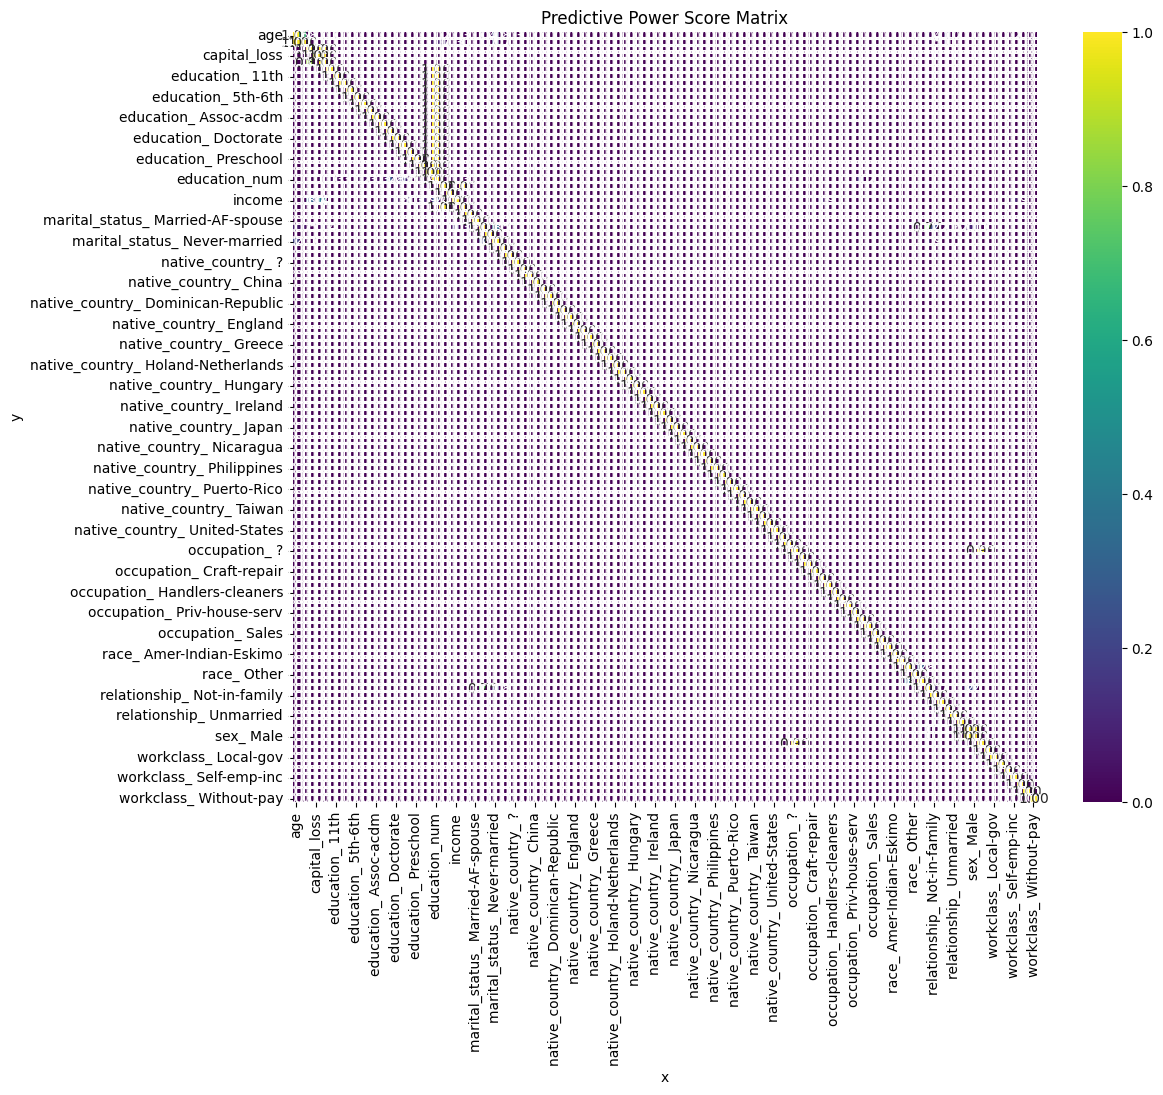

In [23]:
!pip install ppscore==1.3.0
import ppscore as pps
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_encoded'
pps_matrix = pps.matrix(df_encoded)

# Convert 'x' and 'y' columns to string type before pivoting
pps_matrix['x'] = pps_matrix['x'].astype(str)
pps_matrix['y'] = pps_matrix['y'].astype(str)

# Pivot the PPS matrix to create a heatmap-compatible format
heatmap_data = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Convert heatmap data to numeric, handling errors
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Create a heatmap of the PPS matrix
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Predictive Power Score Matrix')
plt.show()

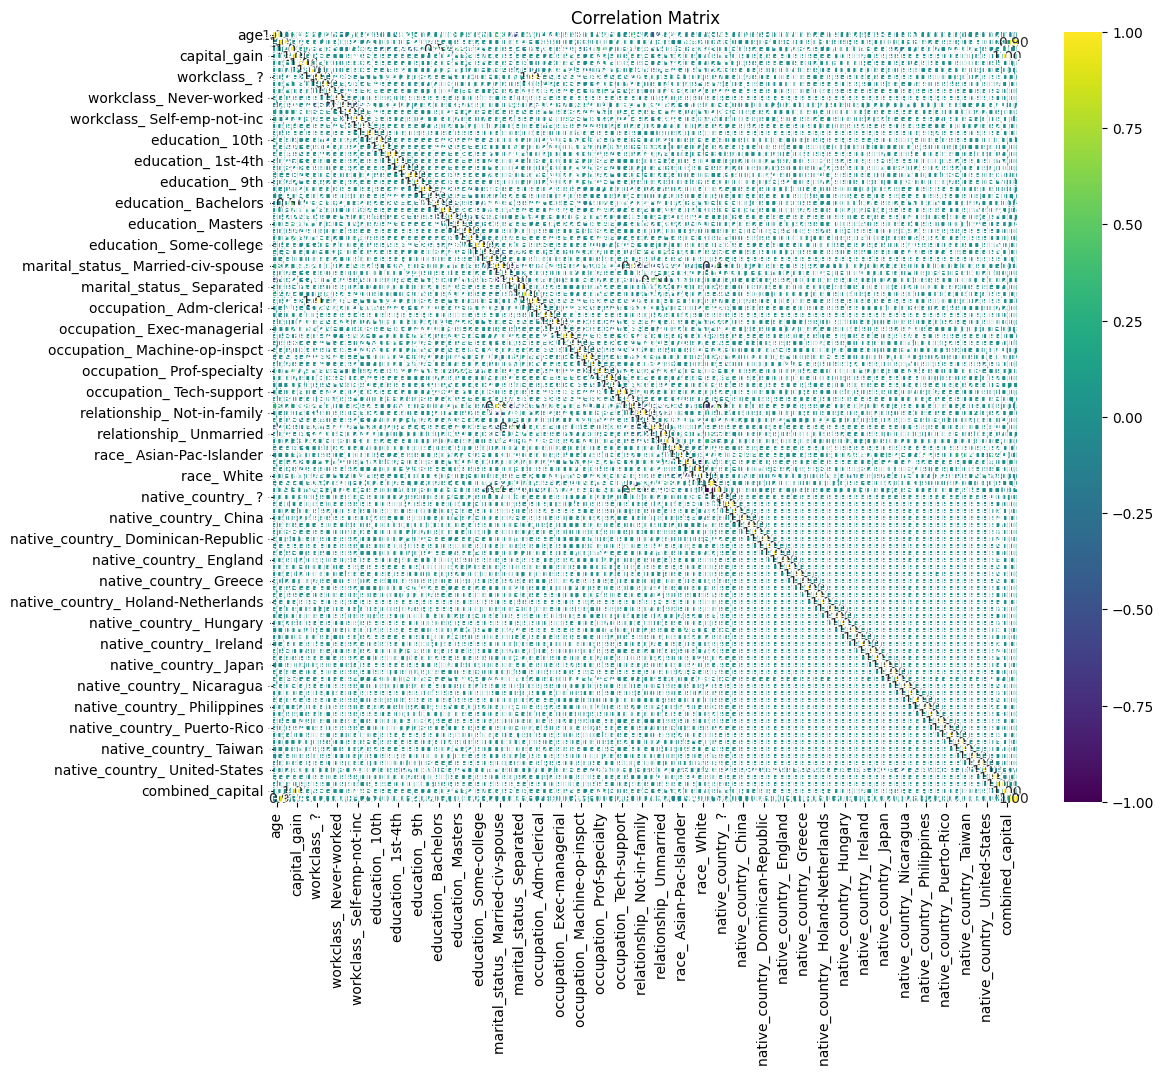

In [27]:
# Calculate the correlation matrix
correlation_matrix=df_encoded.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Compare correlations Matrix and PPS matrix:**

Correlation Matrix: It shows the linear relationships between features. A high positive correlation indicates a strong positive linear relationship, while a high negative correlation indicates a strong negative linear relationship. Values close to 0 indicate weak or no linear relationship.


PPS Matrix: It measures the ability of one feature to predict another feature, regardless of the type of relationship (linear or non-linear). High PPS values indicate strong predictive power, even if the correlation is low.
By comparing the two matrices, you can gain insights into the relationships between features that might not be apparent from the correlation matrix alone.

For example, you might find features with low correlation but high PPS, suggesting a non-linear relationship that could be valuable for predictive modeling.

**Reasoning:**

PPS is a more general measure of relationship than correlation, as it captures both linear and non-linear relationships.

PPS can identify potentially useful features for prediction that might be overlooked by correlation analysis.

Comparing PPS and correlation can provide a more comprehensive understanding of the relationships between features in your data.